


<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.




<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each having a variance of 0.3. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.
2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Write a function called kNNClassify that accepts training data, a test point, and the hyperparameter 'k' as input and returns the label of the test point. Pick a reasonable 'k' for this experiment. Use "kNNClassify" function to generate the labels for the test data generated in part(a) of this PA. Compare the predicted labels with the original labels and calculate the portion of test data points that are correctly classified. In other words, calculate the accuracy of the classifier.
3. Create a visual representation of the predictions by plotting all data points in a 2D plane. Assign green and blue colors to represent class 1 and class 2, respectively. For test data points that are misclassified, assign the color red.
4. Generate and visualize the decision regions of 2D plane that are associated with each class, for a given classifier. Decision regions can be created by classifying all the data points in the 2D grid and assigning class-specific colors to them.

<b> Part(c): Parameter selection: What is good value for k? - </b> One intuitive approach to determine the optimal 'k' is through cross-validation. During cross-validation, a ρ% portion of the training dataset is utilized as the validation dataset, and the model's performance is assessed on this validation set with various 'k' values. Through these cross-validation experiments, we select the 'k' that yields the best performance on the validation data.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check
if there is an improvement on the classification error over the result of Part 2.

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.
2. Try classifying more difficult datasets, for instance, by increasing the variance or adding noise by randomly flipping the labels on the training set.

<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> : This part will not be graded. However, you are recommended to work on it to get exposure to the practical applications of the KNN classifier.

1. Modify the function kNNClassify to handle multi-class problems and hence design a KNN classifier to classify the images in MNIST dataset as one of the 10 digits. The 28x28 images may be flattened to arrive at a 784 dimensional vector. NOTE: If you had already written a kNNClassify for multi class classification in part1 (b), you are free to use it.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%.
3. Empirically determine the most suitable error function, and the corresponding k to maximize the performance on the cross-validation experiments.
4. Apply these values to evaluate the performance on the test dataset.
5. Create a confusion matrix to understand the most confused classes (digits).
6. Suggest alternate ways to improve the performance.



In [ ]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

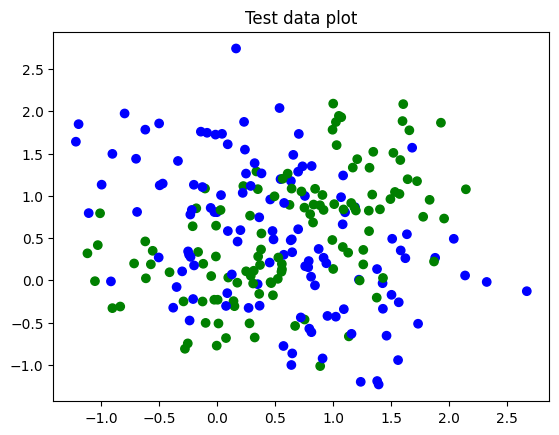

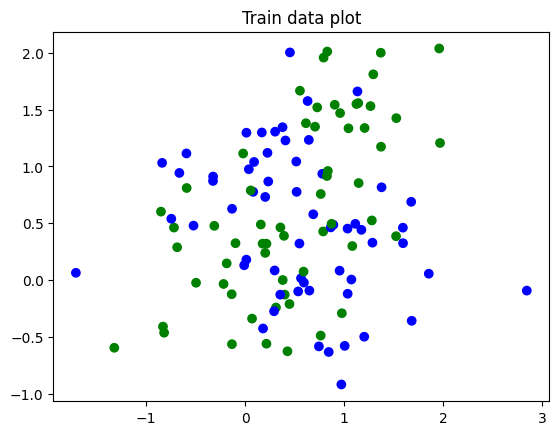

In [ ]:
########################################
#Part(a) #Synthetic data generation
########################################
#Define means and covariances
mean1=np.array([0, 0])
mean2=np.array([0, 1])
mean3=np.array([1, 0])
mean4=np.array([1, 1])
cov=np.diag([0.3,0.3])

#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution
data1 = np.random.multivariate_normal(mean1, cov, size=90)
data2 = np.random.multivariate_normal(mean2, cov, size=90)
data3 = np.random.multivariate_normal(mean3, cov, size=90)
data4 = np.random.multivariate_normal(mean4, cov, size=90)



#Generate training data
train_data1 = data1[:30]
train_data2 = data2[:30]
train_data3 = data3[:30]
train_data4 = data4[:30]

train_data = np.concatenate([train_data1,train_data2,train_data3,train_data4], axis=0)
train_label= np.concatenate([np.ones(30), -np.ones(30), -np.ones(30), np.ones(30)])


#Generate testing data
test_data1= data1[30:]
test_data2= data2[30:]
test_data3= data3[30:]
test_data4= data4[30:]

test_data=np.concatenate([test_data1,test_data2,test_data3,test_data4], axis=0)
test_label= np.concatenate([np.ones(60), -np.ones(60), -np.ones(60), np.ones(60)])

#Visualize the data using plt.scatter() function
full_data=np.concatenate([data1,data2,data3,data4], axis=0)
full_label=np.concatenate([np.ones(90),-np.ones(90),-np.ones(90),np.ones(90)])

color=["green" if label==1  else "blue" for label in test_label]
plt.scatter(test_data[ : ,0], test_data[ : ,1] ,c=color)
plt.title("Test data plot")
plt.show()

color=["green" if label==1  else "blue" for label in train_label]
plt.scatter(train_data[ : ,0], train_data[ : ,1] ,c=color)
plt.title("Train data plot")
plt.show()


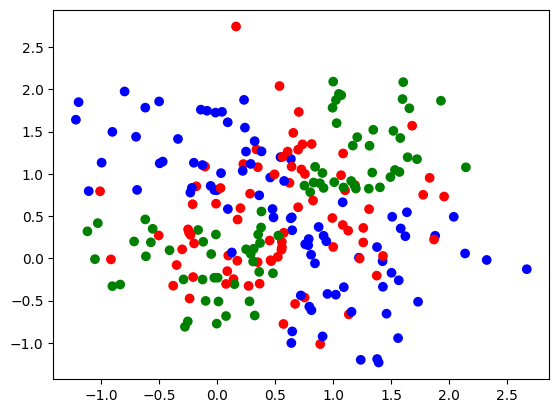

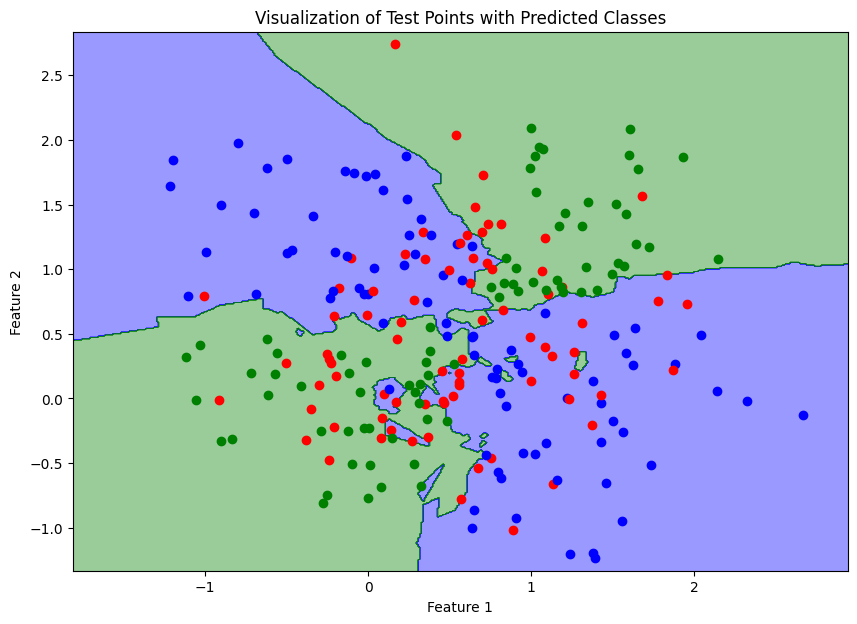

In [ ]:
########################################
#Part(b) #KNN classification
########################################

def distance(x,y):
  p=0
  for i in range(len(x)):
    p=p+(x[i]-y[i])**2
  p=math.sqrt(p)
  return p


#Write "kNNClassify" function
def kNNClassify(X_train,Y_train,X_test,k):
  '''
  #Inputs : Training data (X_train,Y_train), Test points  (X_test), Hyperparameter k
  #Outputs : Predicted class
  '''
  #Algorithm
  #1.Initialize a list to store the predictions of our algorithm
  #2.Iterate through the test points
  #3.    Initialize a list to store the distances of test point with each of the training point.
  #4.    Iterate through the training points
  #5.        Compute the distance between the test and train point
  #6.    Find out the k nearest neighbours
  #7.    Get the most frequent label of k nearest neighbours
  #8.Return the predictions
  #Fill the code
  output=[]
  for t in X_test:
    store=[]
    i=0
    pos=0
    neg=0
    for p in X_train:
      dis=distance(t,p)
      store.append((dis,Y_train[i]))
      i+=1
    store.sort()
    neighbours=store[:k]
    for (_,p) in neighbours:
      if p==1:
        pos+=1
      if p==-1:
        neg+=1
    if pos>neg :
      output.append(+1)
    if pos<=neg:
      output.append(-1)

  return output





#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
  '''
  #Inputs : Ground truth and predicted labels
  #Outputs : Portion of data points that are correctly classified, i.e., accuracy
  '''
  #Algorithm
  #1. Iterate through the total number of predictions
  #2.     Verify wheter the ground truth matches with the predictions
  #3. Compute and return the percentage of the correctly classified points
  #Fill the code
  acc=0

  for i in range(len(true)):
    if true[i]==pred[i]:
      acc+=1
  acc=acc/len(true)
  return acc
k = 5
#Create a visual representation of predictions
predictions = kNNClassify(train_data, train_label, test_data, k)
pink=[]
for i in range(len(predictions)):
  if predictions[i]==test_label[i]:
    pink.append(predictions[i])
  if predictions[i]!=test_label[i]:
    pink.append(0)
color = ["green" if label == 1 else "blue" if label == -1 else "red" for label in pink]
plt.scatter(test_data[ : ,0], test_data[ : ,1] ,c=color)
plt.show()

acc=KNNAccuracy(test_label,predictions)
#print(acc)



#Generate and visualize the decision regions and overlay the test points
# 1. Create a meshgrid for visualization
x_min, x_max = full_data[:, 0].min() - 0.1, full_data[:, 0].max() + 0.1
y_min, y_max = full_data[:, 1].min() - 0.1, full_data[:, 1].max() + 0.1
step = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# 2. Predict the labels for each point in the grid
Z = np.array(kNNClassify(train_data, train_label, grid_points, k))
Z = Z.reshape(xx.shape)

# 3. Visualize the decision regions
plt.figure(figsize=(10, 7))
cmap_custom = ListedColormap([ 'blue', 'green'])

# Visualize the decision regions using the custom colormap
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_custom)


# 4. Plot the test data points with color based on prediction
for i, label in enumerate(pink):
    if label == 1:
        plt.scatter(test_data[i, 0], test_data[i, 1], c='green', label='Predicted Class 1')
    if label==-1:
        plt.scatter(test_data[i, 0], test_data[i, 1], c='blue', label='Predicted Class -1')
    if label==0:
        plt.scatter(test_data[i, 0], test_data[i, 1], c='red', label='Predicted Class 0')



plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of Test Points with Predicted Classes')
plt.show()





[[1, 0.0], [3, 0.23428571428571426], [5, 0.2571428571428571], [7, 0.27142857142857146], [9, 0.2899999999999999], [11, 0.2899999999999999], [13, 0.30142857142857143], [15, 0.33571428571428574], [17, 0.35], [19, 0.33285714285714285], [21, 0.33285714285714285]]
[[1, 0.45666666666666667], [3, 0.5033333333333333], [5, 0.4566666666666667], [7, 0.39], [9, 0.35666666666666663], [11, 0.42666666666666664], [13, 0.4066666666666666], [15, 0.39], [17, 0.3933333333333334], [19, 0.44000000000000006], [21, 0.41]]


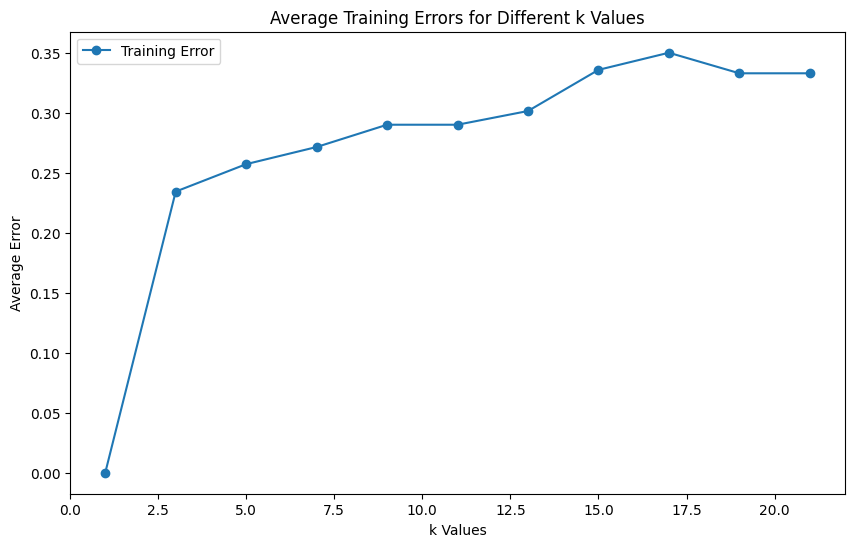

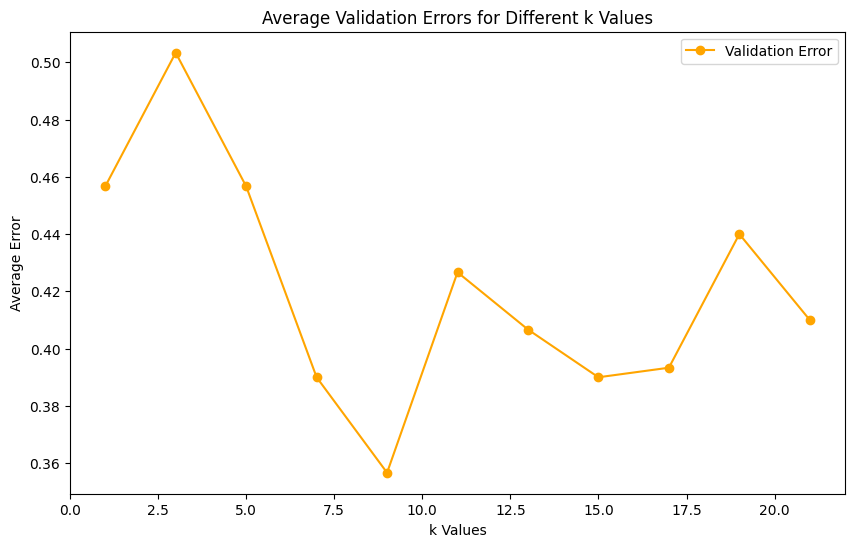

9 is the best k


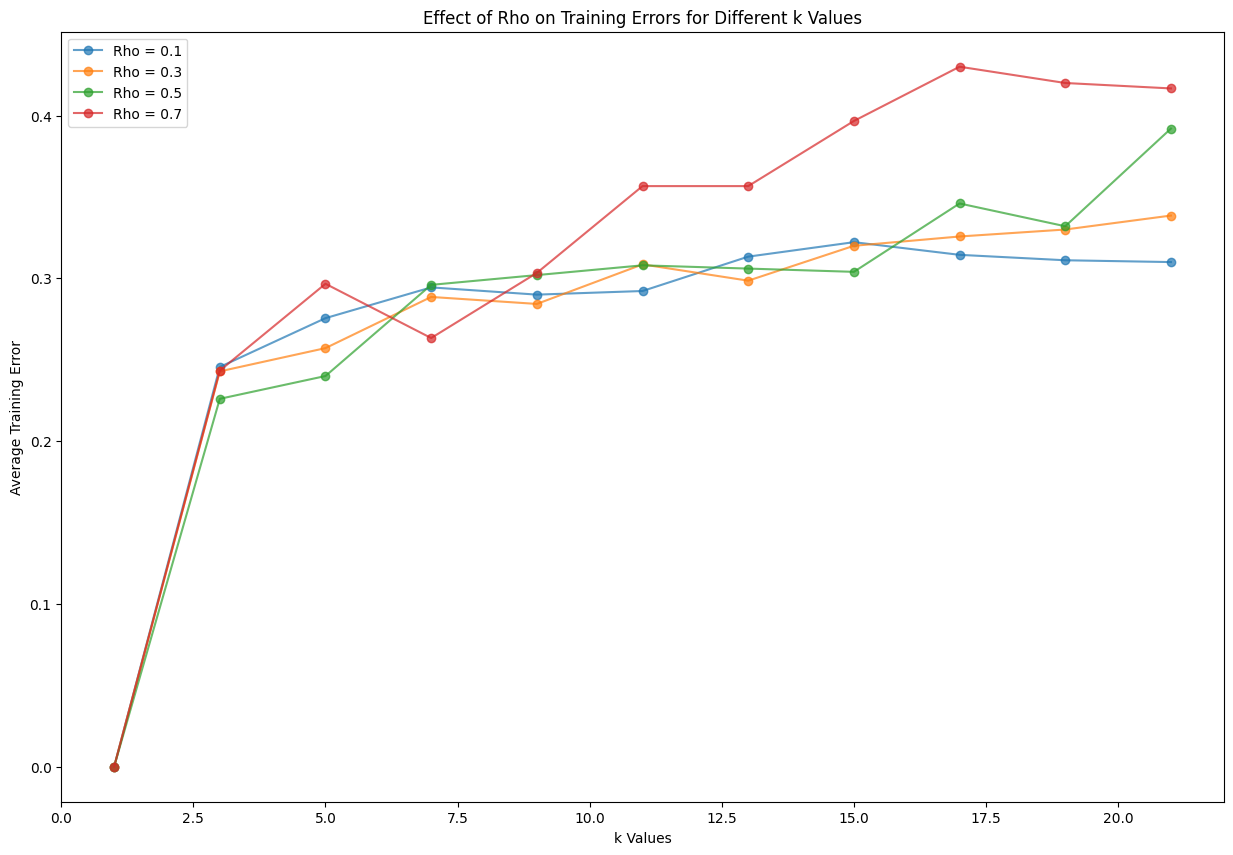

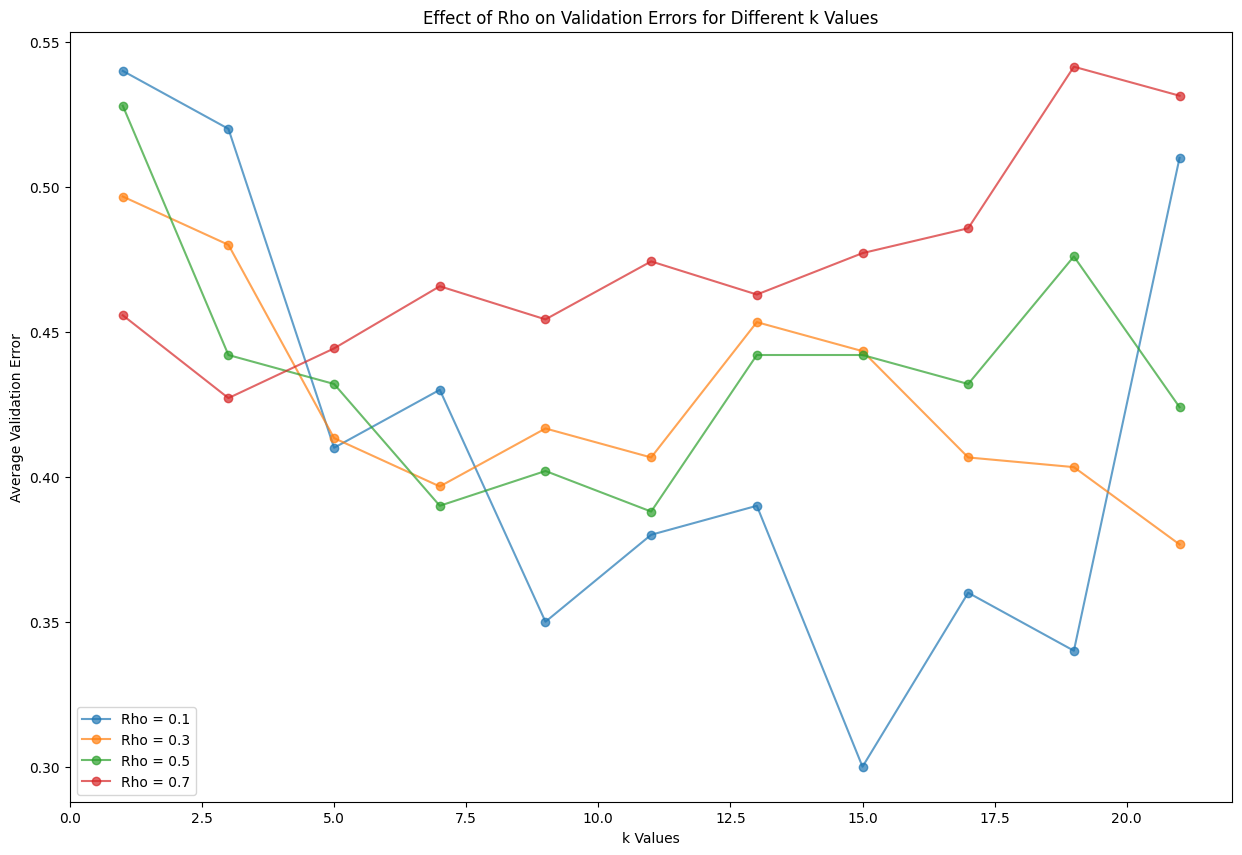

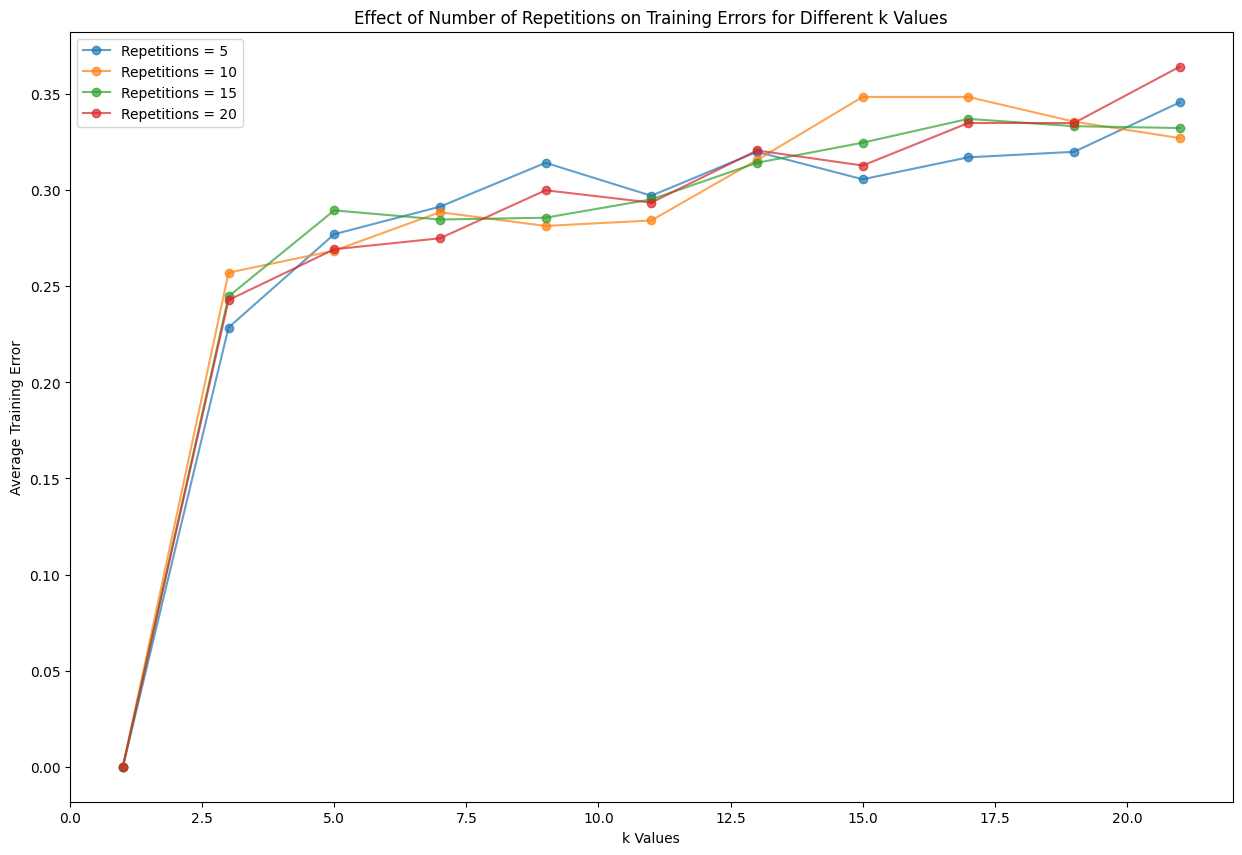

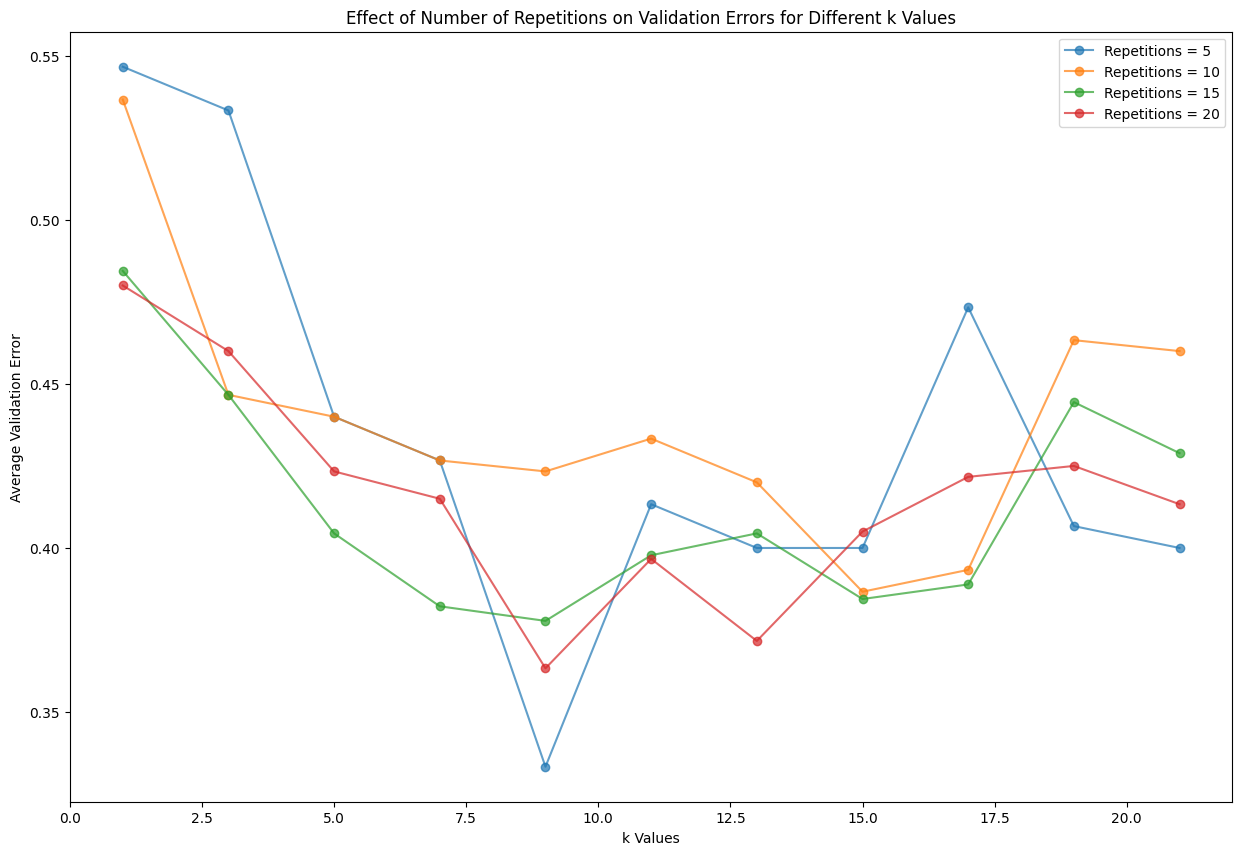

The accuracy achived by best k is 0.65


In [ ]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNN(k_range,numrep,rho,X_train,Y_train):
  valid=[]
  train=[]
  #Iterate through range of k values
    #Iterate through number of repetations
      #Hold out rho fraction of training data in each repetition.
  num=int(rho*len(X_train))
  for k in k_range:
    indices = np.arange(len(X_train))
    train_error_sum =0
    valid_error_sum =0
    for i in range(numrep):
      val=0
      tra=0
      np.random.shuffle(indices)
      train_indices = indices[num:]
      valid_indices = indices[:num]
      X_train_fold = [X_train[i] for i in train_indices]
      Y_train_fold = [Y_train[i] for i in train_indices]
      X_valid_fold = [X_train[i] for i in valid_indices]
      Y_valid_fold = [Y_train[i] for i in valid_indices]
      train_pred =  kNNClassify(X_train_fold, Y_train_fold, X_train_fold, k)
      valid_pred = kNNClassify(X_train_fold, Y_train_fold, X_valid_fold, k)

      train_err = 1 - KNNAccuracy(Y_train_fold, train_pred)
      valid_err = 1 - KNNAccuracy(Y_valid_fold, valid_pred)
      train_error_sum += train_err
      valid_error_sum += valid_err
    train.append([k, train_error_sum / numrep])
    valid.append([k, valid_error_sum / numrep])
  alpha, beta = [item[0] for item in valid], [item[1] for item in valid]
  j=beta[0]
  p=alpha[0]
  #for i in range(0,len(valid)):
   # if j>beta[i]:
    #  j=beta[i]
     # p=alpha[i]
  #best_k=p
  return train,valid
  #Return errors on training and validation data


k_range = list(range(1, 22, 2))
num_repetitions = 10
rho_values = [0.1, 0.3, 0.5,0.7]


#Plot training and validation errors for different values of k
train, valid = holdoutCVkNN(k_range, num_repetitions, rho_values[1], train_data, train_label)
print(train)
print(valid)



plt.figure(figsize=(10, 6))
plt.plot([item[0] for item in train], [item[1] for item in train], marker='o', label='Training Error')
plt.xlabel('k Values')
plt.ylabel('Average Error')
plt.title('Average Training Errors for Different k Values')
plt.legend()
plt.show()

# Plot average validation errors
plt.figure(figsize=(10, 6))
plt.plot([item[0] for item in valid], [item[1] for item in valid], marker='o', label='Validation Error', color='orange')
plt.xlabel('k Values')
plt.ylabel('Average Error')
plt.title('Average Validation Errors for Different k Values')
plt.legend()
plt.show()




#what is the best value for k?
alpha, beta = [item[0] for item in valid], [item[1] for item in valid]
j=beta[0]
p=alpha[0]
for i in range(0,len(valid)):
  if j>beta[i]:
    j=beta[i]
    p=alpha[i]

best_k=p
print(str(best_k)+' is the best k')



#Effect of rho and number repetations on k
# Effect of rho on k for training and validation errors
rho_values = [0.1, 0.3, 0.5, 0.7]
num_repetitions = 10

train_errors_rho = []
valid_errors_rho = []

for rho in rho_values:
    train, valid = holdoutCVkNN(k_range, num_repetitions, rho, train_data, train_label)
    train_errors_rho.append([rho, train])
    valid_errors_rho.append([rho, valid])

# Plot effect of rho on training errors
plt.figure(figsize=(15, 10))
for i, (rho, train_err) in enumerate(train_errors_rho):
    plt.plot([item[0] for item in train_err], [item[1] for item in train_err], marker='o', label=f'Rho = {rho}', alpha=0.7)

plt.xlabel('k Values')
plt.ylabel('Average Training Error')
plt.title('Effect of Rho on Training Errors for Different k Values')
plt.legend()
plt.show()

# Plot effect of rho on validation errors
plt.figure(figsize=(15, 10))
for i, (rho, valid_err) in enumerate(valid_errors_rho):
    plt.plot([item[0] for item in valid_err], [item[1] for item in valid_err], marker='o', label=f'Rho = {rho}', alpha=0.7)

plt.xlabel('k Values')
plt.ylabel('Average Validation Error')
plt.title('Effect of Rho on Validation Errors for Different k Values')
plt.legend()
plt.show()


# Effect of number of repetitions on k for training and validation errors
rho = 0.3  # Use a fixed rho value
num_repetitions_values = [5, 10, 15, 20]

train_errors_repetitions = []
valid_errors_repetitions = []

for num_repetitions in num_repetitions_values:
    train, valid  = holdoutCVkNN(k_range, num_repetitions, rho, train_data, train_label)
    train_errors_repetitions.append([num_repetitions, train])
    valid_errors_repetitions.append([num_repetitions, valid])

# Plot effect of number of repetitions on training errors
plt.figure(figsize=(15, 10))
for i, (repetitions, train_err) in enumerate(train_errors_repetitions):
    plt.plot([item[0] for item in train_err], [item[1] for item in train_err], marker='o', label=f'Repetitions = {repetitions}', alpha=0.7)

plt.xlabel('k Values')
plt.ylabel('Average Training Error')
plt.title('Effect of Number of Repetitions on Training Errors for Different k Values')
plt.legend()
plt.show()

# Plot effect of number of repetitions on validation errors
plt.figure(figsize=(15, 10))
for i, (repetitions, valid_err) in enumerate(valid_errors_repetitions):
    plt.plot([item[0] for item in valid_err], [item[1] for item in valid_err], marker='o', label=f'Repetitions = {repetitions}', alpha=0.7)

plt.xlabel('k Values')
plt.ylabel('Average Validation Error')
plt.title('Effect of Number of Repetitions on Validation Errors for Different k Values')
plt.legend()
plt.show()




#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).
predictions = kNNClassify(train_data, train_label, test_data, best_k)
acc=KNNAccuracy(test_label,predictions)
print('The accuracy achived by best k is '+str(acc))




5)We can say that we can get best value of k that gives least validation error when both values of rho and nuber of repeations are not high.we can also notice that the best k value is almost equal to root of number of points in trainning data.

6)The value of
k in k-Nearest Neighbors (kNN) is influenced by the choice of the percentage of points held out (ρ) and the number of repetitions in a cross-validation procedure. The parameter ρ determines the proportion of training data reserved for validation in each iteration. A smaller ρ results in a larger training set, potentially leading to a more stable estimate but with the risk of overfitting to the training data. Conversely, a larger ρ reduces the training set size, which may mitigate overfitting but introduces higher variance in the estimates. On the other hand, the number of repetitions (numrep) specifies how many times the cross-validation process is repeated. A greater number of repetitions provides a more robust estimate of the model's performance by averaging over multiple random partitions of the data. This helps reduce the impact of randomness in selecting validation sets, yielding a more reliable assessment of how well the model generalizes. The interplay between ρ and the number of repetitions is crucial for finding a balanced k that ensures stable and representative performance on unseen data, striking a chord between an adequately sized training set and a reliable estimate through repeated evaluation

7)We can observe the improvement in part 2 by seeing the increase in accuracy reported in part b and the best accuracy reported above and understand how best k increases model precision.

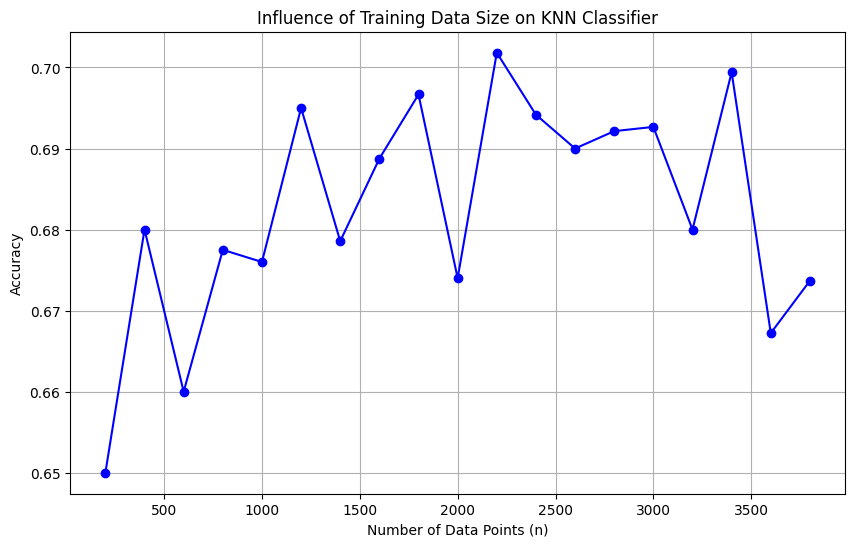

Accuracies of data before and after flipping trainning labels randomly are 0.6583333333333333,0.53125 respectively


In [ ]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases
n=np.arange(200,4000,200)
mean1=np.array([0, 0])
mean2=np.array([0, 1])
mean3=np.array([1, 0])
mean4=np.array([1, 1])
cov=np.diag([0.3,0.3])
set=[]
for k in n:
  data1 = np.random.multivariate_normal(mean1, cov, size=int(k/4))
  data2 = np.random.multivariate_normal(mean2, cov, size=int(k/4))
  data3 = np.random.multivariate_normal(mean3, cov, size=int(k/4))
  data4 = np.random.multivariate_normal(mean4, cov, size=int(k/4))



#Generate training data
  train_data1 = data1[:int(k/8)]
  train_data2 = data2[:int(k/8)]
  train_data3 = data3[:int(k/8)]
  train_data4 = data4[:int(k/8)]

  train_data = np.concatenate([train_data1,train_data2,train_data3,train_data4], axis=0)
  train_label= np.concatenate([np.ones(int(k/8)), -np.ones(int(k/8)), -np.ones(int(k/8)), np.ones(int(k/8))])


#Generate testing data
  test_data1= data1[int(k/8):]
  test_data2= data2[int(k/8):]
  test_data3= data3[int(k/8):]
  test_data4= data4[int(k/8):]

  test_data=np.concatenate([test_data1,test_data2,test_data3,test_data4], axis=0)
  test_label= np.concatenate([np.ones(int(k/8)), -np.ones(int(k/8)), -np.ones(int(k/8)), np.ones(int(k/8))])
  p=math.sqrt(k/2)
  predict=kNNClassify(train_data,train_label,test_data,int(p))
  acc=KNNAccuracy(test_label,predict)
  set.append([k,acc])

n_values = [item[0] for item in set]
accuracy_values = [item[1] for item in set]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Data Points (n)')
plt.ylabel('Accuracy')
plt.title('Influence of Training Data Size on KNN Classifier')
plt.grid(True)
plt.show()

#Experiments with more difficult data set.
data1 = np.random.multivariate_normal(mean1, cov, size=180)
data2 = np.random.multivariate_normal(mean2, cov, size=180)
data3 = np.random.multivariate_normal(mean3, cov, size=180)
data4 = np.random.multivariate_normal(mean4, cov, size=180)



#Generate training data
train_data1 = data1[:60]
train_data2 = data2[:60]
train_data3 = data3[:60]
train_data4 = data4[:60]

train_data = np.concatenate([train_data1,train_data2,train_data3,train_data4], axis=0)
train_label= np.concatenate([np.ones(60), -np.ones(60), -np.ones(60), np.ones(60)])


#Generate testing data
test_data1= data1[60:]
test_data2= data2[60:]
test_data3= data3[60:]
test_data4= data4[60:]

test_data=np.concatenate([test_data1,test_data2,test_data3,test_data4], axis=0)
test_label= np.concatenate([np.ones(120), -np.ones(120), -np.ones(120), np.ones(120)])
p=math.sqrt(360)
predict=kNNClassify(train_data,train_label,test_data,int(p))
acc=KNNAccuracy(test_label,predict)
np.random.shuffle(train_label)
predict=kNNClassify(train_data,train_label,test_data,int(p))
acc1=KNNAccuracy(test_label,predict)

print('Accuracies of data before and after flipping trainning labels randomly are '+str(acc)+','+str(acc1)+ ' respectively')




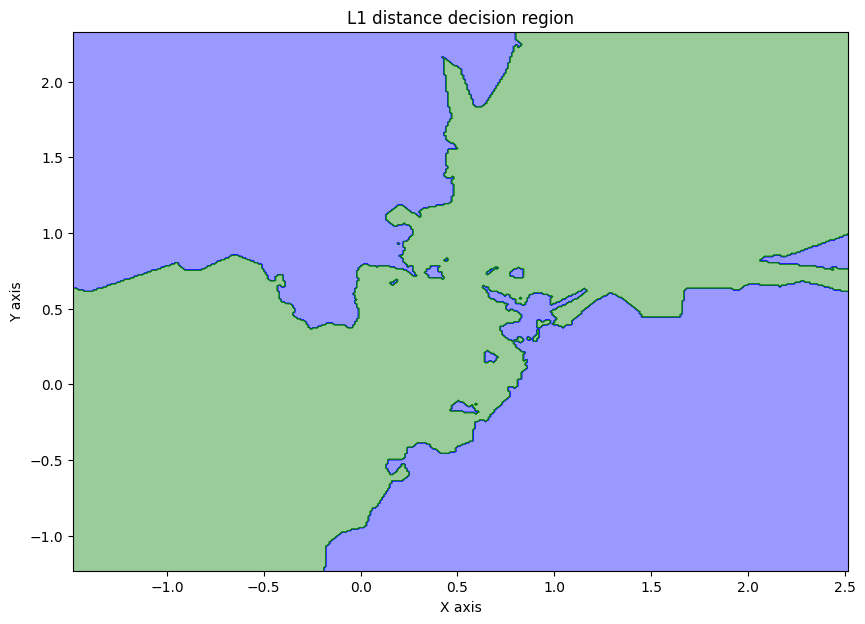

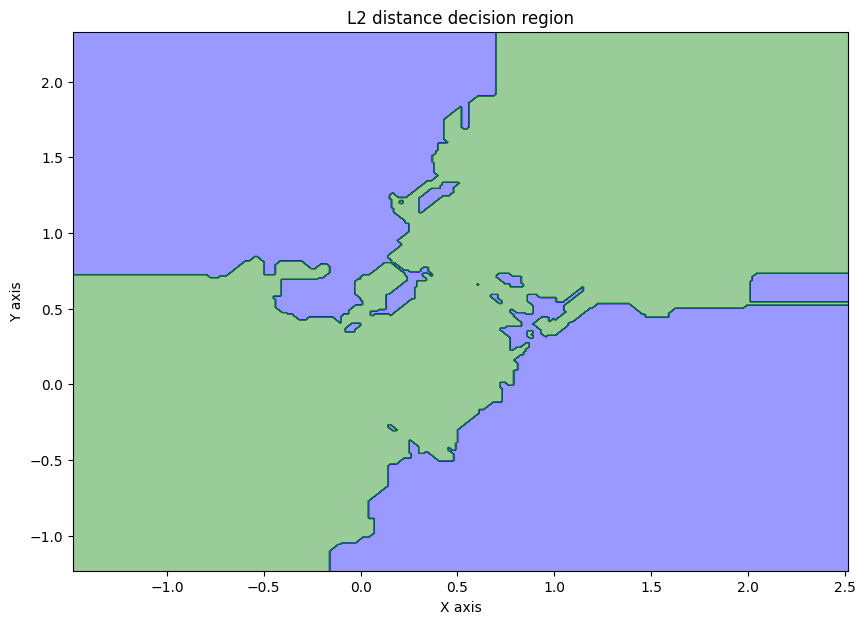

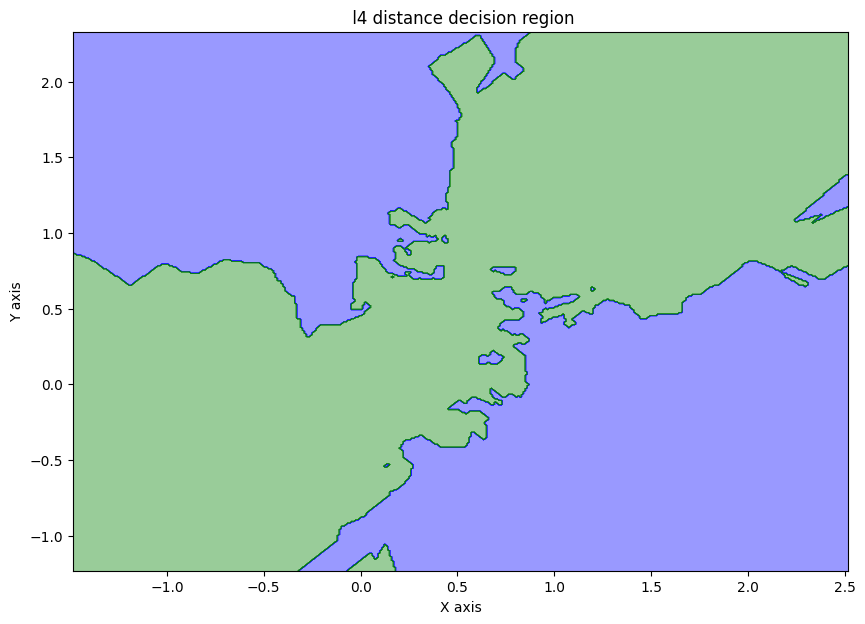

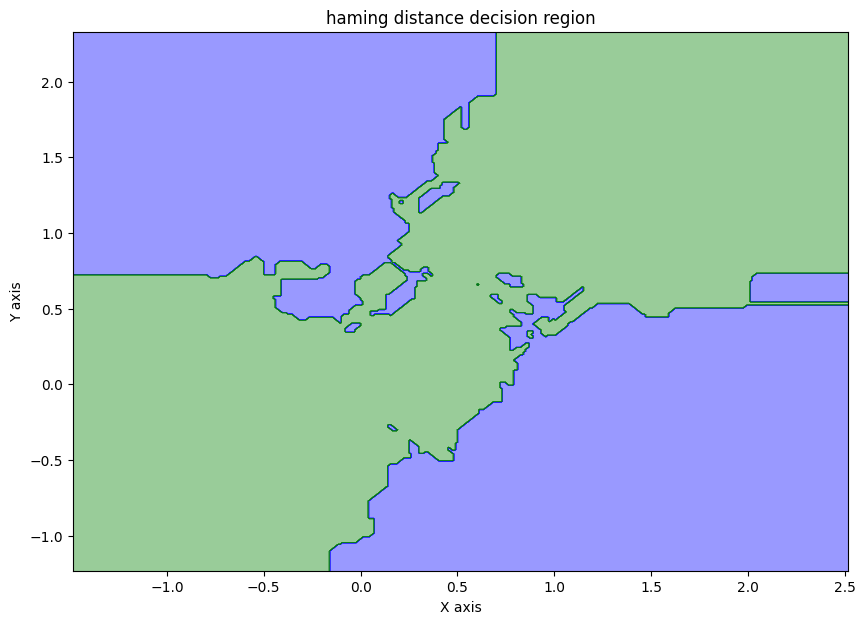

In [ ]:
##################################
#Part(e): Influence of distance measure on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance measures
def distance(x,y):
  p=0
  for i in range(len(x)):
    p=p+(x[i]-y[i])**2
  p=math.sqrt(p)
  return p
def l1(x,y):
  p=0
  for i in range(len(x)):
    p=p+abs(x[i]-y[i])
  return p
def min(x,y,n):
  p=0
  for i in range(len(x)):
    k=abs(x[i]-y[i])
    p=p+k**n
  p=p**(1/n)
  return p
def ham(x,y):
  p=0
  for i in range(len(x)):
    p=p+abs(x[i]-y[i])
  p=p/len(x)
  return p

def kNNClassifynew(X_train,Y_train,X_test,k,f):
  '''
  #Inputs : Training data (X_train,Y_train), Test points  (X_test), Hyperparameter k
  #Outputs : Predicted class
  '''
  #Algorithm
  #1.Initialize a list to store the predictions of our algorithm
  #2.Iterate through the test points
  #3.    Initialize a list to store the distances of test point with each of the training point.
  #4.    Iterate through the training points
  #5.        Compute the distance between the test and train point
  #6.    Find out the k nearest neighbours
  #7.    Get the most frequent label of k nearest neighbours
  #8.Return the predictions
  #Fill the code
  output=[]
  for t in X_test:
    store=[]
    i=0
    pos=0
    neg=0
    for p in X_train:
      if f==1:
        dis=distance(t,p)
      if f==2:
        dis=l1(t,p)
      if f==3:
        dis=min(t,p,4)
      if f==4:
        dis=ham(t,p)
      store.append((dis,Y_train[i]))
      i+=1
    store.sort()
    neighbours=store[:k]
    for (_,p) in neighbours:
      if p==1:
        pos+=1
      if p==-1:
        neg+=1
    if pos>neg :
      output.append(+1)
    if pos<=neg:
      output.append(-1)

  return output

data1 = np.random.multivariate_normal(mean1, cov, size=90)
data2 = np.random.multivariate_normal(mean2, cov, size=90)
data3 = np.random.multivariate_normal(mean3, cov, size=90)
data4 = np.random.multivariate_normal(mean4, cov, size=90)



#Generate training data
train_data1 = data1[:30]
train_data2 = data2[:30]
train_data3 = data3[:30]
train_data4 = data4[:30]

train_data = np.concatenate([train_data1,train_data2,train_data3,train_data4], axis=0)
train_label= np.concatenate([np.ones(30), -np.ones(30), -np.ones(30), np.ones(30)])


#Generate testing data
test_data1= data1[30:]
test_data2= data2[30:]
test_data3= data3[30:]
test_data4= data4[30:]

test_data=np.concatenate([test_data1,test_data2,test_data3,test_data4], axis=0)
test_label= np.concatenate([np.ones(60), -np.ones(60), -np.ones(60), np.ones(60)])
k=int(math.sqrt(180))
pred1=kNNClassifynew(train_data,train_label,test_data,k,1)
pred2=kNNClassifynew(train_data,train_label,test_data,k,2)
pred3=kNNClassifynew(train_data,train_label,test_data,k,3)
pred4=kNNClassifynew(train_data,train_label,test_data,k,4)

acc1=KNNAccuracy(test_label,pred1)
acc2=KNNAccuracy(test_label,pred2)
acc3=KNNAccuracy(test_label,pred3)
acc4=KNNAccuracy(test_label,pred4)



#Understand the decision regions of KNN classifier with different distance measures
x_min, x_max = full_data[:, 0].min() - 0.1, full_data[:, 0].max() + 0.1
y_min, y_max = full_data[:, 1].min() - 0.1, full_data[:, 1].max() + 0.1
step = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# 2. Predict the labels for each point in the grid
Z1 = np.array(kNNClassifynew(train_data, train_label, grid_points, k,1))
Z1 = Z1.reshape(xx.shape)

# 3. Visualize the decision regions
plt.figure(figsize=(10, 7))
cmap_custom = ListedColormap([ 'blue', 'green'])

# Visualize the decision regions using the custom colormap
plt.contourf(xx, yy, Z1, alpha=0.4, cmap=cmap_custom)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('L1 distance decision region')
plt.show()

Z2 = np.array(kNNClassifynew(train_data, train_label, grid_points, k,2))
Z2 = Z2.reshape(xx.shape)
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z2, alpha=0.4, cmap=cmap_custom)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('L2 distance decision region')
plt.show()

Z3 = np.array(kNNClassifynew(train_data, train_label, grid_points, k,3))
Z3 = Z3.reshape(xx.shape)
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z3, alpha=0.4, cmap=cmap_custom)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title(' l4 distance decision region')
plt.show()

Z4 = np.array(kNNClassifynew(train_data, train_label, grid_points, k,4))
Z4 = Z4.reshape(xx.shape)
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z4, alpha=0.4, cmap=cmap_custom)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('haming distance decision region')
plt.show()


In [ ]:
##################################
#Part(f): Influence of distance measure on KNN classifier
##################################

#Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()
#Plot a few images
#plt.subplot(211)
#plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
#plt.subplot(212)
#plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

#Create train, validation and test splits
train_image=images[:int(0.8*len(images))]
valid_image=images[int(0.8*len(images)):int(0.9*len(images))]
test_image=images[int(0.9*len(images)):]

train_target=targets[:int(0.8*len(targets))]
valid_target=targets[int(0.8*len(targets)):int(0.9*len(targets))]
test_target=targets[int(0.9*len(targets)):]

#Write 'MultiClassKNNClassify' function
def MultiClassKNNClassify(X_train, Y_train, X_test, k, distance_measure):
    predictions = []
    for test_point in X_test:
        distances = [distance_measure(test_point, train_point) for train_point in X_train]
        indices = np.argsort(distances)[:k]
        neighbors_labels = Y_train[indices]

        # Use a custom function to find the most common class label among neighbors
        predicted_label = most_common(neighbors_labels)
        predictions.append(predicted_label)

    return predictions

def most_common(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    index = np.argmax(counts)
    return unique_labels[index]



#Empirically chose most suitable k and error function based on the evauation on cross-validation data
#Evaluate the performance using different values of 'k' on the validation data and select the optimal 'k' for the test data.
#Evaluation the performance using different distance measures (l1,l2, etc) on the validation data and select the optimal distance measure for test data.
best_accuracy = 0.0
best_k = 0
best_distance_measure = 0
k_range = [1,3,5,7,9,11,13,15,17]
distance_measures = [l1,distance,ham]  # You can replace these with appropriate identifiers for your distance measures

best_accuracy = 0.0
best_k = 0
best_distance_measure = 0

# Iterate over k values and distance measures
for k in k_range:
    for distance_measure in distance_measures:
        # Initialize the confusion matrix and accuracy
        confusion_matrix = np.zeros((10, 10), dtype=int)
        accuracy = 0.0

        # Perform cross-validation on the validation set
        for i in range(len(valid)):
            # Create a training set by excluding the current validation sample
            X_train_cv = np.delete(train_image, i, axis=0)
            Y_train_cv = np.delete(train_target, i)

            # Predict using MultiClassKNNClassify function
            predictions = MultiClassKNNClassify(X_train_cv, Y_train_cv, [valid[i]], k, distance_measure)

            # Update the confusion matrix
            confusion_matrix[int(valid_target[i])][int(predictions[0])] += 1

        # Calculate accuracy from the confusion matrix
        accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

        # Check if the current combination is the best
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_distance_measure = distance_measure

# Print the best parameters
print("Best k:", best_k)
print("Best distance measure:", str(best_distance_measure))
print("Best accuracy:", best_accuracy)

# Evaluate the performance on the test data with the best hyperparameters (k, error_func) obtained from cross-validation
predictions = MultiClassKNNClassify(train_image, train_target, test_image, best_k, distance_measure=distance)
print(predictions)
acc = KNNAccuracy(test_target, predictions)
print(acc)






#Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    '''
    Inputs: Ground truth labels and classifier predictions
    Outputs: Confusion matrix
    '''
    num_classes = 10  # Assuming you have 10 classes for digits
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for i in range(len(true)):
        confusion_matrix[int(true[i])][int(pred[i])] += 1

    return confusion_matrix

conf_matrix = compute_confusion_matrix(test1, predictions)
print("Confusion Matrix:")
print(conf_matrix)

#Suggest an alternative ways to improve performance





/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


KeyboardInterrupt: 

<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution

2. Write down the best accuracy on MNIST validation and test data.

3. Report your observations on the confusion matrix of KNN classifier on MNIST test data

answers:

1)Best accuracy is reported below the graphs in outputs of part c.I am not writing a particular value because the input values change continuously when ever u run the cell.

2)Best accuracy on validation data is 0.8142857142857143 while that of test data is 0.8.

3)
Observations of confusion matrix are as follow:


1. Diagonal Elements (True Positives):
   The diagonal elements represent the number of instances where the true class and the predicted class match. In the provided matrix, higher values along the diagonal indicate that the classifier has correctly identified instances of those particular digits.

2. Off-diagonal Elements (False Positives and False Negatives):
   Off-diagonal elements represent misclassifications. For example, the value at the (3, 2) position indicates the number of instances where the true class was 3, but the classifier predicted class 2. This suggests a confusion between the digits 3 and 2.

3. Class 5 and 9 Confusion:
    There seems to be confusion between classes 5 and 9, as evidenced by the non-zero values in the (5, 9) and (9, 5) positions. This could be due to similarities in the visual representations of these digits.

4. Class 2 and 7 Confusion:
    Similar to the 5 and 9 confusion, there is confusion between classes 2 and 7 (non-zero values in the (2, 7) and (7, 2) positions).

5. Overall Model Performance:
   To assess the overall performance of the kNN classifier, it is important to look at the sum of the diagonal elements (true positives) compared to the total number of instances. The accuracy of the classifier can be calculated as the sum of true positives divided by the total number of instances.


